<a href="https://colab.research.google.com/github/NurayVakitbilir/Vakitbilir_CNG562_HW1/blob/master/Vakitbilir_adult_census_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [0]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler

In [0]:
import warnings 
warnings.filterwarnings('ignore')

## **Importing the data**

In [0]:
data_url='https://raw.githubusercontent.com/NurayVakitbilir/Vakitbilir_CNG562_HW1/master/adult.csv'
income = pd.read_csv(data_url)

## **Data Exploration and Preparation**

In [0]:
income.loc[income['native.country']!='United-States','native.country'] = 'not_USA' #grouping the features
income.loc[income['race']!='White', 'race'] = 'not_white'
income.loc[income['workclass']!='Private', 'workclass'] = 'not_private'

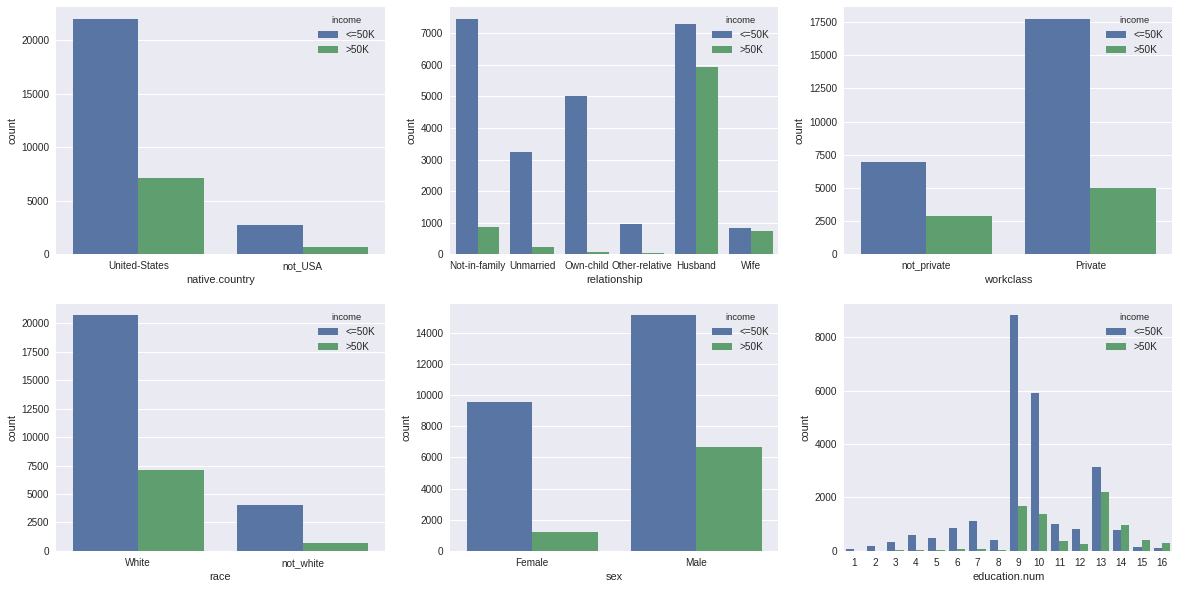

In [6]:
import seaborn as sns
fig, ((a,b,c),(d,e,f)) = plt.subplots(2,3,figsize=(20,10))
sns.countplot(income['native.country'],hue=income['income'],ax=a)
sns.countplot(income['relationship'],hue=income['income'],ax=b)
sns.countplot(income['workclass'],hue=income['income'],ax=c)
sns.countplot(income['race'],hue=income['income'],ax=d)
sns.countplot(income['sex'],hue=income['income'],ax=e)
sns.countplot(income['education.num'],hue=income['income'],ax=f)

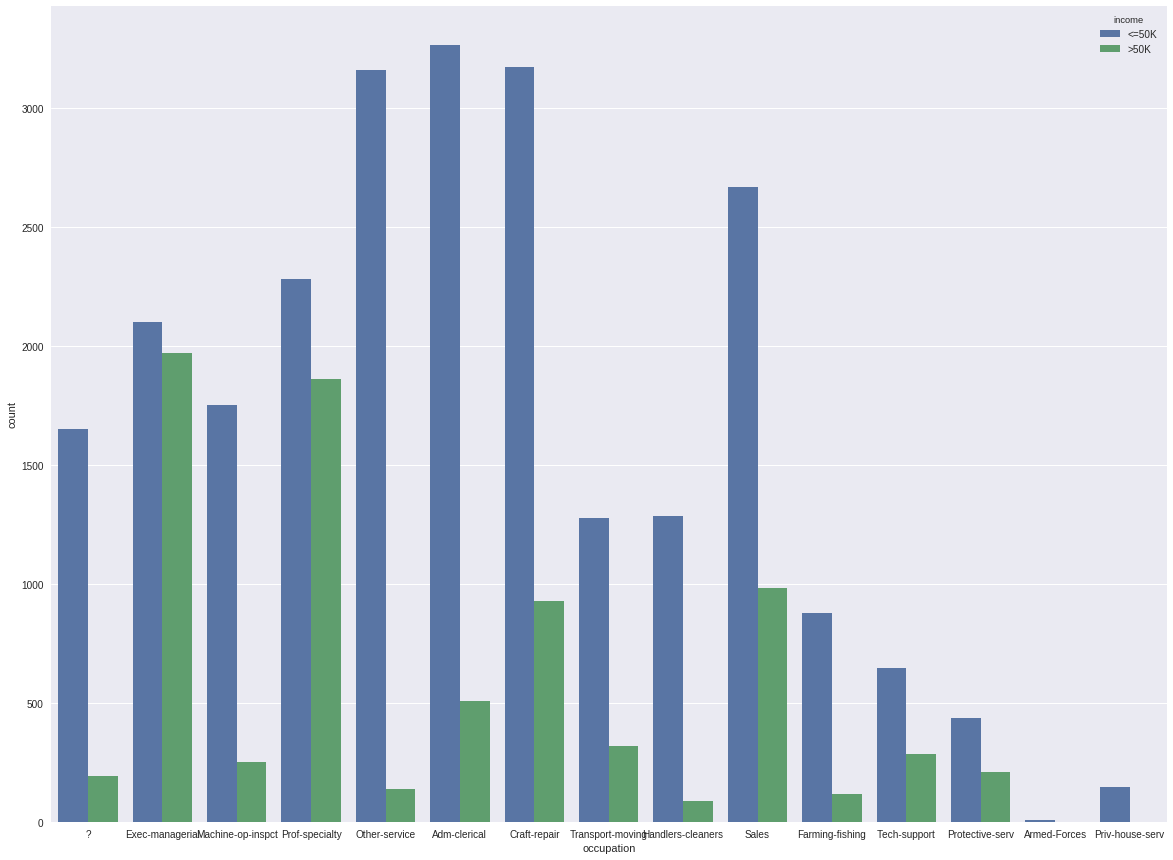

In [7]:
fig, ((a))= plt.subplots(1,1,figsize=(20,15))
sns.countplot(income['occupation'],hue=income['income'],ax=a)

In [0]:
1.0 * (income['education.num']>13) #classifing education into 1 and 0
income = income.drop('education', axis=1) #getting rid of education as it represents the same as education.num

In [0]:
categorical_features = ['workclass', 
                       'occupation',
                       'marital.status',
                       'relationship', 
                       'race', 
                       'sex', 
                       'native.country']

In [0]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

ct = ColumnTransformer(transformers=[('categorical_transformer',
                                      categorical_transformer,
                                      categorical_features)], remainder='passthrough')
X = ct.fit_transform(income.drop('income', axis=1))
y = income['income'] == '>50K'

In [0]:
X_scaled = MaxAbsScaler().fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.5)

## **Training**

### *Logistic Regression*

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=45,solver='lbfgs',multi_class='ovr').fit(X_train, y_train)
print('Accuracy for Logistic Regression traning:', accuracy_score(y_train, log_reg.predict(X_train)))
print('Accuracy for Logistic Regression test:', accuracy_score(y_test, log_reg.predict(X_test)))

Accuracy for Logistic Regression traning: 0.847051597051597
Accuracy for Logistic Regression test: 0.8444812972176157


### *Decision Tree Classifier*

In [14]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=5, random_state=45).fit(X_train, y_train)
print('Accuracy for Decision tree training:', accuracy_score(y_train, tree.predict(X_train)))
print('Accuracy for Decision tree testing:', accuracy_score(y_test, tree.predict(X_test)))

Accuracy for Decision tree training: 0.8443488943488944
Accuracy for Decision tree testing: 0.8428843437135312


### *Support Vector Classifier*

In [15]:
from sklearn.svm import SVC
svc = SVC(C=2, kernel='linear',max_iter=5, tol=0.001, random_state=1).fit(X_train, y_train)
print('Accuracy for Support Vector Machine traning:', accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy for Support Vector Machine testing:', accuracy_score(y_test, svc.predict(X_test)))

Accuracy for Support Vector Machine traning: 0.7127149877149878
Accuracy for Support Vector Machine testing: 0.7132854247282108


### *K-Neighbors Classifier*

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2).fit(X_train, y_train)
print('Accuracy for KNN training:', accuracy_score(y_train, knn.predict(X_train)))
print('Accuracy for KNN testing:', accuracy_score(y_test, knn.predict(X_test)))

Accuracy for KNN training: 0.8754299754299755
Accuracy for KNN testing: 0.8243351145507033


## **Grid Search and Cross-Validation**

In [0]:
from sklearn.model_selection import GridSearchCV

### *Logistic Regression*

In [18]:
reg = LogisticRegression()
parameters = {'random_state': (1,10,50,100), 'tol' : (0.001, 0.01, 0.1), 'solver' : ('lbfgs', 'liblinear', 'sag', 'saga'), 'max_iter' : (2,3,4,5,6,10,20)}
gscvreg = GridSearchCV(estimator = reg, param_grid = parameters, n_jobs=-1, cv=5 ).fit(X_train, y_train)
print(gscvreg.best_params_)
print('Accuracy for Logistic regression training:', accuracy_score(y_train, gscvreg.predict(X_train)))
print('Accuracy for Logistic regression testing:', accuracy_score(y_test, gscvreg.predict(X_test)))

{'max_iter': 10, 'random_state': 1, 'solver': 'liblinear', 'tol': 0.001}
Accuracy for Logistic regression training: 0.846928746928747
Accuracy for Logistic regression testing: 0.8445427185062343


### *Decision Tree Classifier*

In [19]:
tree = DecisionTreeClassifier()
parameters = {'random_state': (1,10,100,150), 'max_leaf_nodes' : (15,50,64,70), 'max_depth': (7,10,20,30)}
gscvtree = GridSearchCV(estimator = tree, param_grid = parameters, n_jobs=-1, cv=5 ).fit(X_train, y_train)
print(gscvtree.best_params_)
print('Accuracy for decision tree training:', accuracy_score(y_train, gscvtree.predict(X_train)))
print('Accuracy for decision tree testing:', accuracy_score(y_test, gscvtree.predict(X_test)))

{'max_depth': 7, 'max_leaf_nodes': 50, 'random_state': 1}
Accuracy for decision tree training: 0.8615479115479115
Accuracy for decision tree testing: 0.8539401756648854


### *Support Vector Classifier*

In [20]:
svc = SVC()
parameters = {'C': (1,2,3), 'kernel': ('linear','rbf','poly'), 'max_iter' :(2,3,10), 'random_state': (1,50), 'tol' : (0.000001, 0.1)}
gscvsvc = GridSearchCV(estimator = svc, param_grid = parameters, n_jobs=-1, cv=5).fit(X_train, y_train)
print(gscvsvc.best_params_)
print('Accuracy for decision tree training:', accuracy_score(y_train, gscvsvc.predict(X_train)))
print('Accuracy for decision tree testing:', accuracy_score(y_test, gscvsvc.predict(X_test)))

{'C': 2, 'kernel': 'rbf', 'max_iter': 2, 'random_state': 1, 'tol': 1e-06}
Accuracy for decision tree training: 0.7607493857493858
Accuracy for decision tree testing: 0.7594128124808058


### K-Neaighbor Classifier

KNN classifier in grid search takes infinitly long time to converge.

In [0]:
#knn = KNeighborsClassifier()
#parameters = {'n_neighbors': (2,29),'p' : (4,6)}
#gscvknn = GridSearchCV(estimator = knn, param_grid = parameters, n_jobs=-1, cv=4).fit(X_train, y_train)
#print(gscvknn.best_params_)
#print('Accuracy for train KNN training:', accuracy_score(y_train, gscvknn.predict(X_train)))
#print('Accuracy as for test KNN testing:', accuracy_score(y_test, gscvknn.predict(X_test)))

*** Grid search and cross validation results show that Decision Tree Classifier could be a best fit for Adult_census_income dataset.***